In [1]:
# Import PyTorch
import torch
from torch import nn
# Import TorchVision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
# Import matplotlib for visualization
import matplotlib.pyplot as plt
print(f"Torch Version: {torch.__version__}")
print(f"TorchVision Version: {torchvision.__version__}")

Torch Version: 2.0.1+cpu
TorchVision Version: 0.15.2+cpu


In [2]:
# Downloading dataset from torchvision datasets
# Setup Train Data
train_data = torchvision.datasets.FashionMNIST(root="data",
                                               train = True,
                                               download= True,
                                               transform = ToTensor(),
                                               target_transform = None)
# Setup Testing Data
test_data = torchvision.datasets.FashionMNIST(root="data",
                                               train = False,
                                               download= True,
                                               transform = ToTensor()
                                               )

100%|██████████| 26421880/26421880 [00:01<00:00, 19737470.55it/s]


Extracting data\FashionMNIST\raw\train-images-idx3-ubyte.gz to data\FashionMNIST\raw



100%|██████████| 29515/29515 [00:00<00:00, 4552119.23it/s]


Extracting data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to data\FashionMNIST\raw



100%|██████████| 4422102/4422102 [00:00<00:00, 20569954.63it/s]


Extracting data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to data\FashionMNIST\raw



100%|██████████| 5148/5148 [00:00<?, ?it/s]

Extracting data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to data\FashionMNIST\raw



In [3]:
# Check Data if downloaded properly
image, label = train_data[0]
print(f"Image: {image}")
print(f"Label: {label}")

Image: tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 

In [4]:
image.shape

torch.Size([1, 28, 28])

In [5]:
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

In [6]:
# See Classes (Type of clusters/ groups of data)
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

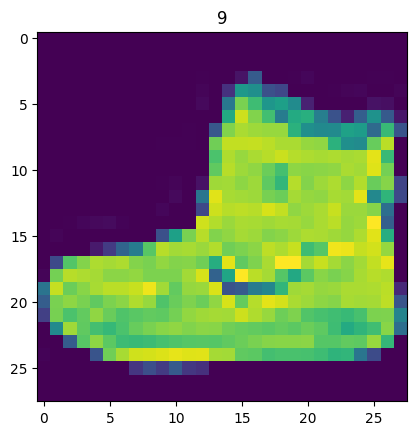

In [7]:
# Visualize the data
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label)

Text(0.5, 1.0, 'Ankle boot')

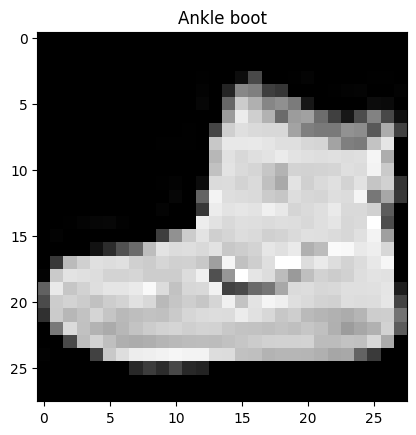

In [8]:
plt.imshow(image.squeeze(), cmap = 'gray')
plt.title(class_names[label])

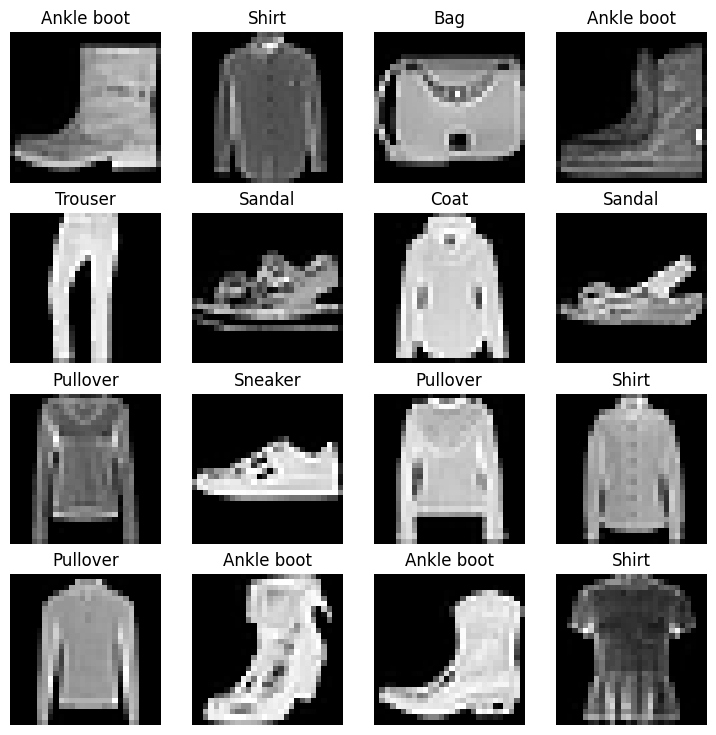

In [9]:
#Plot few more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1, rows*cols + 1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False);

In [10]:
from torch.utils.data import DataLoader
# Setup Batch Size
BATCH_SIZE = 32    #Good place to start
# Turn Datasets into Iterables
train_dataloader = DataLoader(train_data,
                              batch_size = BATCH_SIZE,
                              shuffle= True,
                              )
test_dataloader = DataLoader(test_data,
                             batch_size = BATCH_SIZE,
                             shuffle = True
                             )
print(f"Train Dataloader: {train_dataloader} | Test Dataloader: {test_dataloader}")
print(f"Length of Train DataLoader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of Test DataLoader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Train Dataloader: <torch.utils.data.dataloader.DataLoader object at 0x0000027E5AEA2E90> | Test Dataloader: <torch.utils.data.dataloader.DataLoader object at 0x0000027E602F6ED0>
Length of Train DataLoader: 1875 batches of 32
Length of Test DataLoader: 313 batches of 32


In [11]:
# Check out whats inside training dataloader
training_features_batch, training_labels_batch = next(iter(train_dataloader))
training_features_batch.shape, training_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


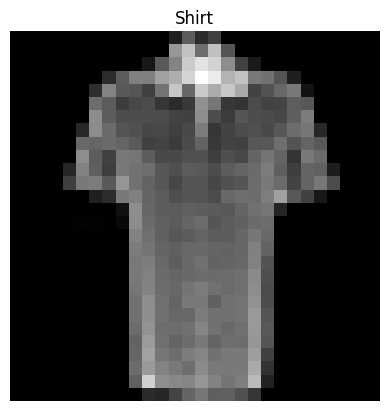

In [12]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(training_features_batch), size =[1]).item()
img, label = training_features_batch[random_idx], training_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap = 'gray')
plt.title(class_names[label])
plt.axis('Off')
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

In [13]:
# Using nn.Flatten as we are working with image (compresses dim of tensor into single vector)
flatten_model = nn.Flatten()
# Get a single Sample
x = training_features_batch[0]
# Flatten the sample
output = flatten_model(x)  # perform forward pass
print(f"Shape before: {x.shape}")
print(f"Shape after: {output.shape}")

Shape before: torch.Size([1, 28, 28])
Shape after: torch.Size([1, 784])


In [14]:
# Create Base model
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self, input_shape:int, hidden_units: int, output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_shape, out_features = hidden_units),
        nn.Linear(in_features = hidden_units, out_features = output_shape)
    )
  def forward(self, x):
    return self.layer_stack(x)

In [15]:
torch.manual_seed(42)
model_0 = FashionMNISTModelV0(input_shape = 784,  # from Feature vector 28*28 = 784
                              hidden_units = 10,
                              output_shape = len(class_names))
model_0.to("cpu")

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [16]:
import requests
from pathlib import Path
# Download Helper functions from Learn Pytorch Repo
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [17]:
# Import accuracy Metric
from helper_functions import accuracy_fn
#setup loss function and optimzer
loss_fn = nn.CrossEntropyLoss()
optimizer= torch.optim.SGD(params = model_0.parameters(), lr=0.01)

In [18]:
from timeit import default_timer as timer
def print_train_time(start: float, end:float, device: torch.device = None):
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [19]:
# Import tqdm for progress bar
from tqdm.auto import tqdm
# set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()
#set the number of epochs
epochs = 3     # Keeping this shorter for faster training times
# Create training and testing loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}")
  ### Training
  train_loss = 0
  for batch, (X,y) in enumerate(train_dataloader):
    model_0.train()
    #1. Forward pass
    y_pred = model_0(X)
    #2. Calculate Loss (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss
    #3. optimizer zero grad
    optimizer.zero_grad()
    #4. Loss Backward
    loss.backward()
    #5. Optimizer step
    optimizer.step()
    #Print out how many samples have been seen
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)} / {len(train_dataloader.dataset)} samples")
  #Divide total train loss by length of train dataloader (Avg loss per batch per epoch)
  train_loss /= len(train_dataloader)
  ### Testing
  test_loss, test_acc = 0,0
  model_0.eval()
  with torch.inference_mode():
    for X,y in test_dataloader:
      #1. Forward pass
      test_pred = model_0(X)
      #2. Calculate loss (Accumulatively)
      test_loss += loss_fn(test_pred,y)
      #3. Calculate accuracy (Preds need to be same as y_true)
      test_acc += accuracy_fn(y_true = y, y_pred = test_pred.argmax(dim=1))
    # Calculations on test metrics need to happen inside torch.inference_mode()
    test_loss /= len(test_dataloader)   #test_loss by batch
    test_acc /= len(test_dataloader)    # test_loss by batch
  print(f"\nTrain loss: {train_loss:.5f} | Test Loss: {test_loss:.5f} | Test Accuracy: {test_acc:.2f}%\n")
# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start = train_time_start_on_cpu,
                                            end = train_time_end_on_cpu,
                                            device = str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples

Train loss: 0.90961 | Test Loss: 0.62955 | Test Accuracy: 78.60%

Epoch: 1
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples

Train loss: 0.55714 | Test Loss: 0.55011 | Test Accuracy: 80.87%

Epoch: 2
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples

Train loss: 0.50232 | Test Loss: 0.51386 | Test Accuracy: 82.32%

Train time on cpu: 50.958 seconds


In [20]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    loss, acc = 0,0
    model.eval()
    with torch.inference_mode():
      for X,y in data_loader:
        # Make predictions in Model
        y_pred = model(X)
        # Accumulate loss and accuracy values per batch
        loss += loss_fn(y_pred, y)
        acc += accuracy_fn(y_true = y, y_pred = y_pred.argmax(dim=1))
      # Scale loss and acc to find the avg loss/ acc per batch
      loss /= len(data_loader)
      acc /= len(data_loader)
    return {"model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc}
model_0_results = eval_model(model = model_0,
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn = accuracy_fn)
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.5130522847175598,
 'model_acc': 82.3582268370607}

In [21]:
# Setup device agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [22]:
# Create a model with non-linear and linear layers
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # flatten inputs into single vector
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )
    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

In [23]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784, # number of input features
    hidden_units=10,
    output_shape=len(class_names) # number of output classes desired
).to(device) # send model to GPU if it's available
next(model_1.parameters()).device # check model device

device(type='cpu')

In [24]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [25]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)
        # 1. Forward pass
        y_pred = model(X)
        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels
        # 3. Optimizer zero grad
        optimizer.zero_grad()
        # 4. Loss backward
        loss.backward()
        # 5. Optimizer step
        optimizer.step()
    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")
def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)
            # 1. Forward pass
            test_pred = model(X)
            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )
        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [26]:
torch.manual_seed(42)
# Measure Time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n------")
  train_step(model = model_1,
             data_loader = train_dataloader,
             loss_fn = loss_fn,
             optimizer = optimizer,
             accuracy_fn = accuracy_fn)
  test_step(model = model_1,
            data_loader = test_dataloader,
            loss_fn = loss_fn,
            accuracy_fn = accuracy_fn)
train_time_end_on_gpu = timer()
total_train_time_model_1= print_train_time(start = train_time_start_on_gpu,
                                           end = train_time_end_on_gpu,
                                           device = device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Train loss: 1.09199 | Train accuracy: 61.34%
Test loss: 0.95690 | Test accuracy: 64.98%

Epoch: 1
------
Train loss: 0.73779 | Train accuracy: 73.69%
Test loss: 0.72388 | Test accuracy: 74.21%

Epoch: 2
------
Train loss: 0.66776 | Train accuracy: 76.08%
Test loss: 0.68751 | Test accuracy: 75.64%

Train time on cpu: 48.881 seconds


In [27]:
torch.manual_seed(42)
# Note: This will error due to `eval_model()` not using device agnostic code
model_1_results = eval_model(model=model_1,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn)
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6873754262924194,
 'model_acc': 75.64896166134186}

In [28]:
# Move values to device
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to the target device
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
        # Scale loss and acc
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}
# Calculate model 1 results with device-agnostic code
model_1_results = eval_model(model=model_1, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn,
    device=device
)
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6873754262924194,
 'model_acc': 75.64896166134186}

In [29]:
# Check baseline results
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.5130522847175598,
 'model_acc': 82.3582268370607}

In [30]:
# Create a CNN
class FashionMNISTModelV2(nn.Module):
  def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
    super().__init__()
    self.block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )
    self.block_2 = nn.Sequential(
        nn.Conv2d(hidden_units, hidden_units, 3, padding = 1),
        nn.ReLU(),
        nn.Conv2d(hidden_units, hidden_units, 3, padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        # Where did this in_features shape come from?
        # It's because each layer of our network compresses and changes the shape of our inputs data.
        nn.Linear(in_features = hidden_units * 7* 7,
                  out_features = output_shape)
    )
  def forward(self, x: torch.Tensor):
    x = self.block_1(x)
    #print(x.shape)
    x = self.block_2(x)
    # print(x.shape)
    x = self.classifier(x)
    # print(x.shape)
    return x
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape = 1,
                              hidden_units = 10,
                              output_shape = len(class_names)).to(device)
model_2

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [31]:
# Setup loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                             lr=0.1)

In [32]:
torch.manual_seed(42)
# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()
# Train and Test Model
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-----")
  train_step(model = model_2,
             data_loader = train_dataloader,
             loss_fn = loss_fn,
             optimizer=optimizer,
             accuracy_fn = accuracy_fn,
             device = device
             )
  test_step(model = model_2,
            data_loader = test_dataloader,
            loss_fn = loss_fn,
            accuracy_fn = accuracy_fn,
            device = device)
  train_time_end_model_2 = timer()
  total_train_time_model_2 = print_train_time(start = train_time_start_model_2,
                                              end=  train_time_end_model_2,
                                              device= device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Train loss: 0.59292 | Train accuracy: 78.51%
Test loss: 0.38923 | Test accuracy: 85.87%

Train time on cpu: 49.370 seconds
Epoch: 1
-----
Train loss: 0.35998 | Train accuracy: 86.91%
Test loss: 0.37782 | Test accuracy: 86.75%

Train time on cpu: 90.590 seconds
Epoch: 2
-----
Train loss: 0.32442 | Train accuracy: 88.34%
Test loss: 0.33559 | Test accuracy: 87.80%

Train time on cpu: 128.710 seconds


In [33]:
# Get model_2 results
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3349775969982147,
 'model_acc': 87.81948881789137}

In [34]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.513052,82.358227
1,FashionMNISTModelV1,0.687375,75.648962
2,FashionMNISTModelV2,0.334978,87.819489


In [35]:
# Add training times to results comparision
compare_results['training_time'] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.513052,82.358227,50.957702
1,FashionMNISTModelV1,0.687375,75.648962,48.881374
2,FashionMNISTModelV2,0.334978,87.819489,128.709605


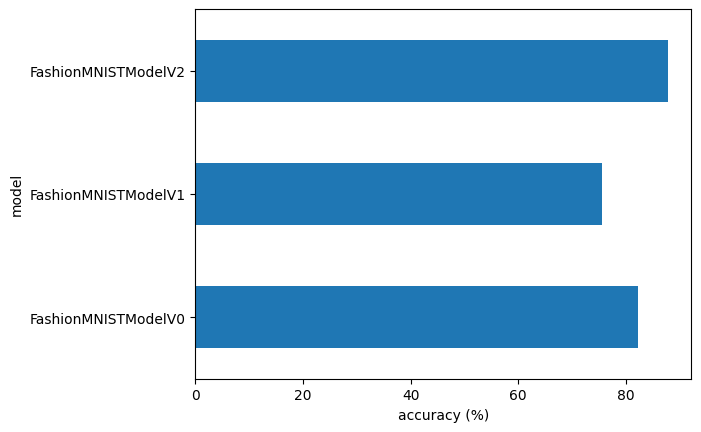

In [36]:
# Visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model");

In [37]:
def make_predictions(model: torch.nn.Module, data:list, device: torch.device = device):
  pred_probs = []
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare sample
      sample = torch.unsqueeze(sample, dim=0).to(device)  # Add extra dimension and add it to device
      # Forward Pass
      pred_logit = model(sample)
      # Get Prediction Probability (logit -> prediction probability)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)   # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 1, so can perform on dim=0)
      # Get pred_prob Off GPU for further calculations
      pred_probs.append(pred_prob.cpu())
  return torch.stack(pred_probs)

In [38]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)
# View first test sample shape and label
print(f"First test sample: {test_samples[0]} \n First sample shape: {test_samples[0].shape} \n First sample Label: {class_names[test_labels[0]]} ")

First test sample: tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.00

In [39]:
# Mak predictions on test samples with model_2
pred_probs = make_predictions(model = model_2,
                              data = test_samples)
# View first 2 prediction probs
pred_probs[:2]

tensor([[9.9986e-08, 4.2559e-08, 4.5243e-08, 1.0790e-08, 2.2376e-09, 9.9916e-01,
         1.4743e-08, 4.8475e-05, 9.7321e-06, 7.8131e-04],
        [2.1249e-02, 9.2965e-01, 3.6775e-04, 3.6411e-02, 1.9142e-03, 5.1530e-05,
         1.0078e-02, 2.6145e-05, 2.0143e-04, 4.8554e-05]])

In [40]:
# Turn the prediction probabilities into prediction labels by taking the argmax()
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

In [41]:
test_labels, pred_classes

([5, 1, 7, 4, 3, 0, 4, 7, 1], tensor([5, 1, 7, 4, 3, 0, 4, 7, 1]))

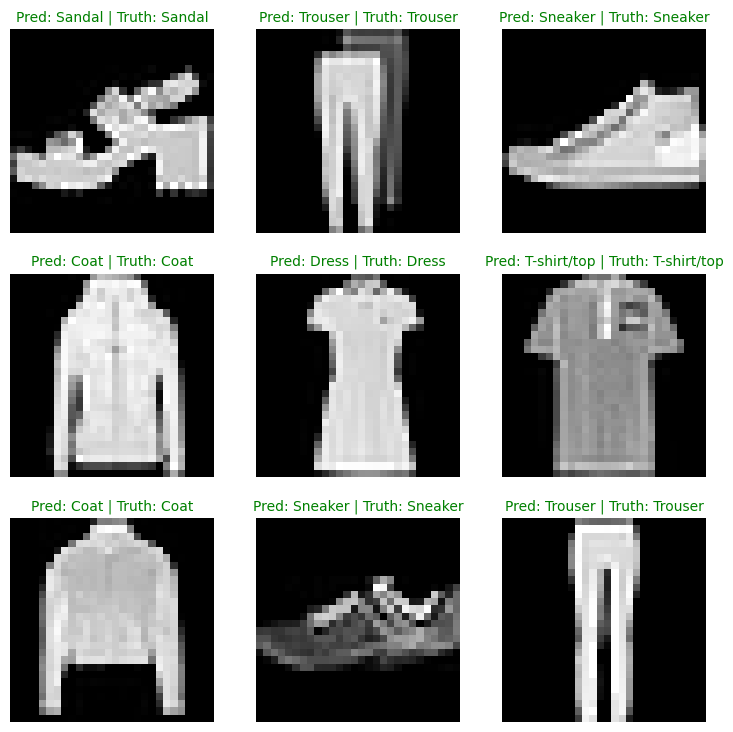

In [42]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)
  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")
  # Find the prediction label (in text form, e.g. "Sandal")
  pred_label = class_names[pred_classes[i]]
  # Get the truth label (in text form, e.g. "T-shirt")
  truth_label = class_names[test_labels[i]]
  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"
  # Check for equality and change title colour accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);

In [43]:
### Step 1: Make Predicions
#Import tqdm for pregress bar
from tqdm.auto import tqdm
#1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X,y in tqdm(test_dataloader, desc = "Making Predictions"):
    # send data and targets to target device
    X,y = X.to(device), y.to(device)
    #Forward pass
    y_logit = model_2(X)
    #Turn logits -> Pred Probs -> Pred labels
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)  # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 32, so can perform on dim=1)
    #put predictions on cpu for evaluation
    y_preds.append(y_pred.cpu())
# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)

Making Predictions:   0%|          | 0/313 [00:00<?, ?it/s]

In [47]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.22.0


In [48]:
# Import mlxtend upgraded version
import mlxtend
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19 # should be version 0.19.0 or higher

0.22.0


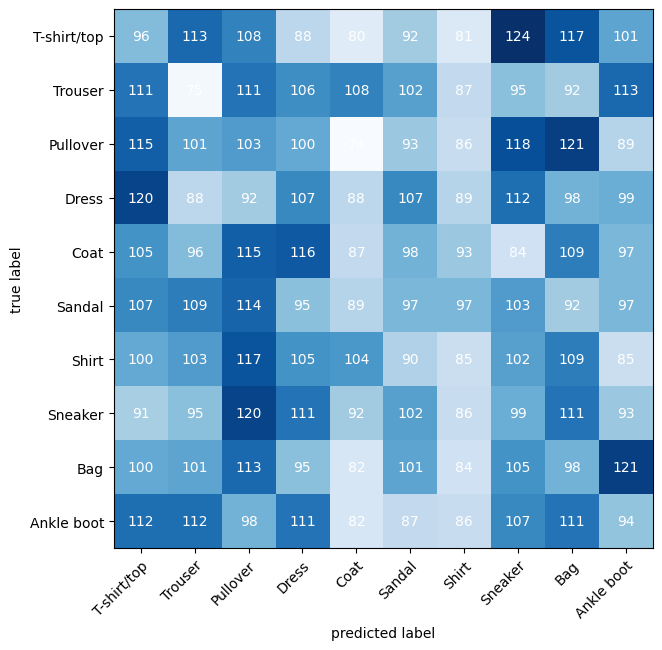

In [49]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix
## Step 2: Make confusion matrix using torchmetrics.ConfusionMatrix
# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes = len(class_names),task = 'multiclass' )
confmat_tensor = confmat(preds = y_pred_tensor,
                         target = test_data.targets)
#3. Plot Confusion Matrix
fig, ax = plot_confusion_matrix(conf_mat = confmat_tensor.numpy(),
                                class_names = class_names,
                                figsize= (10,7))

In [51]:
from pathlib import Path
# Create models directory (if it doesn't already exist), see: https://docs.python.org/3/library/pathlib.html#pathlib.Path.mkdir
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, # create parent directories if needed
                 exist_ok=True # if models directory already exists, don't error
)
# Create model save path
MODEL_NAME = "pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(), # only saving the state_dict() only saves the learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models\pytorch_computer_vision_model_2.pth


In [52]:
# Create a new instance of FashionMNISTModelV2 (the same class as our saved state_dict())
# Note: loading model will error if the shapes here aren't the same as the saved version
loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                    hidden_units=10, # try changing this to 128 and seeing what happens
                                    output_shape=10)
# Load in the saved state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
# Send model to GPU
loaded_model_2 = loaded_model_2.to(device)

In [53]:
# Evaluate loaded model
torch.manual_seed(42)
loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)
loaded_model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.33486583828926086,
 'model_acc': 87.83945686900958}

In [54]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3349775969982147,
 'model_acc': 87.81948881789137}

In [55]:
# Check to see if results are close to each other (if they are very far away, there may be an error)
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-08, # absolute tolerance
              rtol=0.0001) # relative tolerance

tensor(False)